# Does the sensor move over the course of the recording?
There's sort of a smear, or a jump around the Z axis in the data. I'm going to look at difference parts of the session and see if I can work around the jumps. I think it's making my background filtering worse.

In [36]:
import os
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [37]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.'''
    
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the 'box size'.
    box_size = max([x_range, y_range, z_range]) / 2.0

    ax.set_xlim3d([x_middle - box_size, x_middle + box_size])
    ax.set_ylim3d([y_middle - box_size, y_middle + box_size])
    ax.set_zlim3d([z_middle - box_size, z_middle + box_size])

## Look at all the frames superimposed on each other

In [39]:
# Make a dataframe of all the points
def layer_frames(path, start_frame, until_frame, sample_percentage=1.0):
    # Initialize a list to store points
    all_points = []
    
    # Generate a list of frame numbers in the given range
    frame_numbers = list(range(start_frame, until_frame))
    
    # Sample the frame numbers based on the sample_percentage
    if sample_percentage < 1.0:
        # Shuffle the frame numbers
        random.shuffle(frame_numbers)
        num_samples = int(len(frame_numbers) * sample_percentage)
        frame_numbers = frame_numbers[:num_samples]
    
    # Load data from the shuffled and sampled frames
    for frame in frame_numbers:
        # Make the frame path
        frame_number = str(frame).zfill(6)
        frame_path = os.path.join(path, f"{frame_number}.bin")
        print('.', end='')

        # If that frame exists
        if os.path.exists(frame_path):
            # Load the points
            points = np.fromfile(frame_path, dtype=np.float32).reshape(-1, 4)

            # Add them to the list
            all_points.append(points)
    
    # Stack all points arrays into one numpy array
    if all_points:
        all_points = np.vstack(all_points)  # Combine the arrays

        # Convert the numpy array to a pandas DataFrame
        df = pd.DataFrame(all_points, columns=['X', 'Y', 'Z', 'Intensity'])  # Adjust column names if necessary

        return df
    else:
        return pd.DataFrame()

In [62]:
first_all_points = layer_frames('../../data/velodyne_points', 0, 100)
last_all_points = layer_frames('../../data/velodyne_points', 6300, 6400)
all_points = all_points = pd.concat([first_all_points, last_all_points], ignore_index=True)

........................................................................................................................................................................................................

In [63]:
print(all_points)

                X          Y         Z  Intensity
0        2.115613  73.891815  6.034641   0.109804
1        2.122603  75.051704  3.058908   0.149020
2       -6.921934  98.988274  2.887876   0.168627
3       -2.089314  98.107201  2.283417   0.109804
4        2.112056  75.142876  1.312142   0.152941
...           ...        ...       ...        ...
8785945  0.382832  16.244387 -2.068274   0.031373
8785946 -0.330241  13.046823 -2.030432   0.035294
8785947  0.232524   9.940367 -1.988629   0.054902
8785948 -0.189628   7.389397 -2.069261   0.047059
8785949  0.096457   4.186031 -1.952497   0.160784

[8785950 rows x 4 columns]


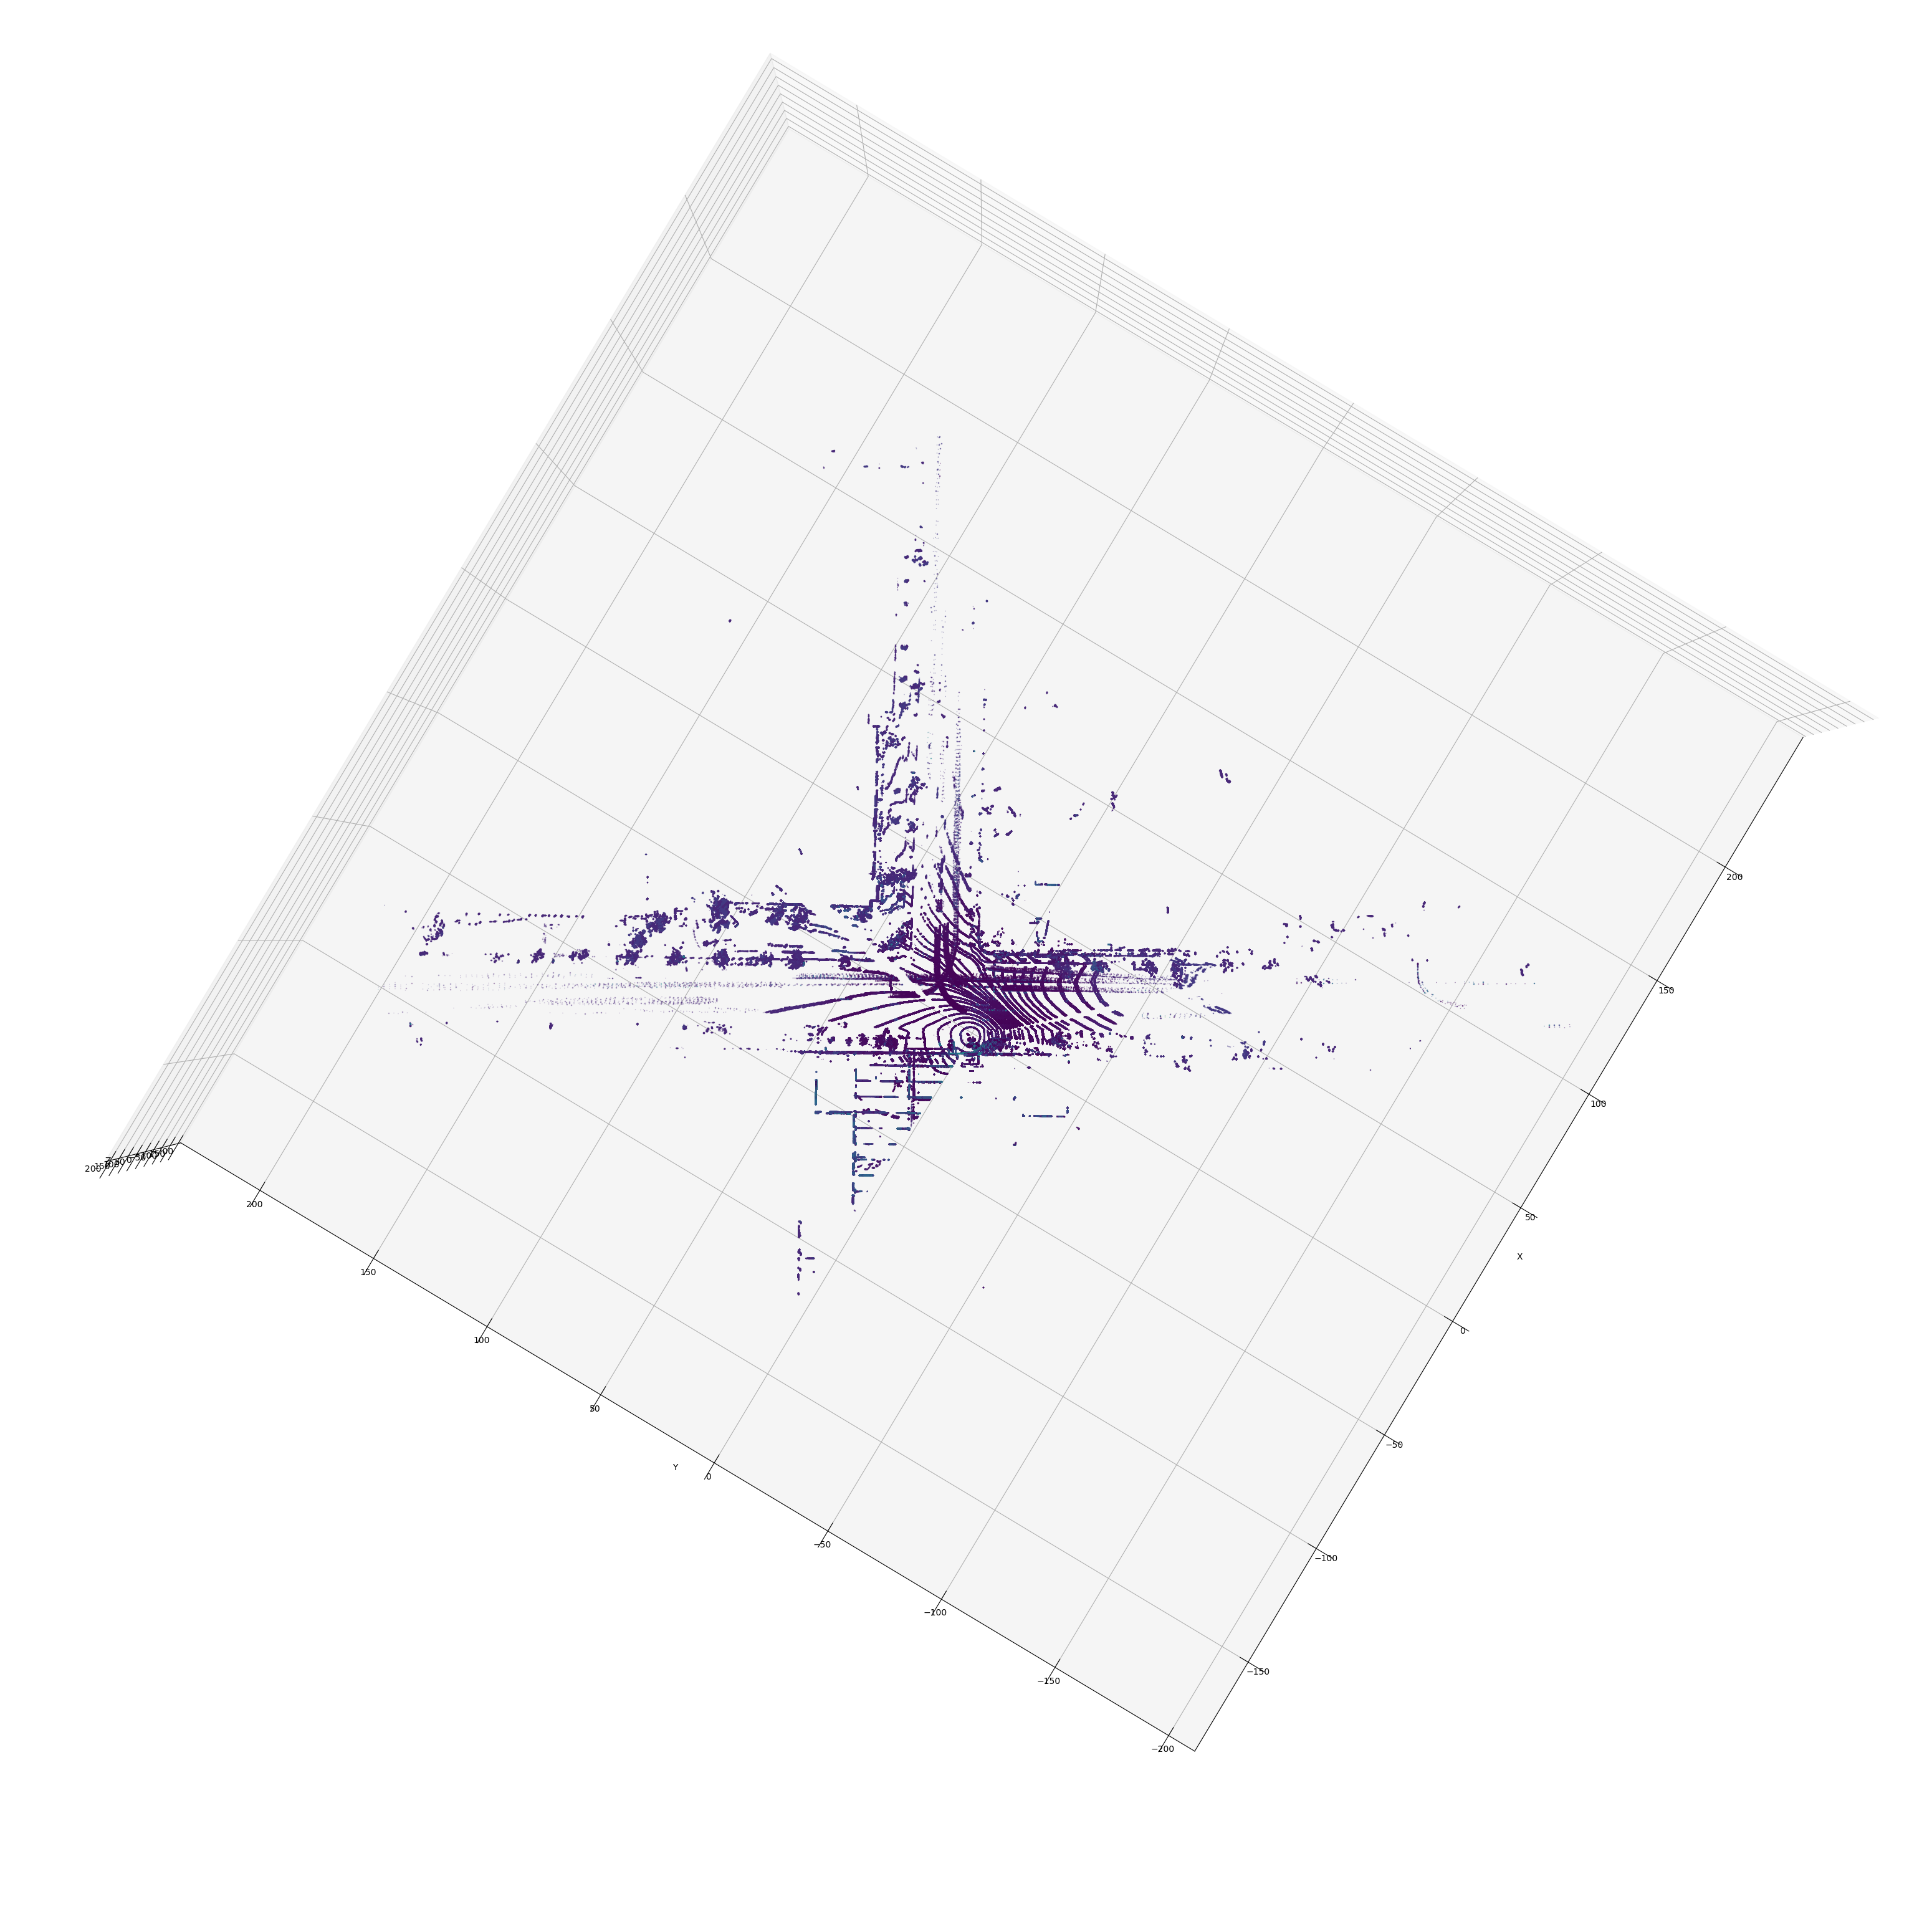

In [64]:
# Set up the plot
fig = plt.figure(figsize=(40, 40))
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud
ax.scatter(all_points['X'], all_points['Y'], all_points['Z'], s=0.1, c=all_points['Intensity'], cmap='viridis', marker=',')

# Setting the axes properties
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adjust the view angle if needed
ax.view_init(elev=90, azim=210) # You can change these angles to get a better view

# Fix aspect ratio
set_axes_equal(ax)

plt.show()

## Look at a smaller number of frames
I'll do a casual, visual binary search

In [68]:
first_section = layer_frames('../../data/velodyne_points', 0, 1000)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [69]:
print(first_section)

                 X          Y         Z  Intensity
0         2.115613  73.891815  6.034641   0.109804
1         2.122603  75.051704  3.058908   0.149020
2        -6.921934  98.988274  2.887876   0.168627
3        -2.089314  98.107201  2.283417   0.109804
4         2.112056  75.142876  1.312142   0.152941
...            ...        ...       ...        ...
35243743  0.396123  16.208345 -2.063728   0.031373
35243744 -0.320756  13.031243 -2.027973   0.047059
35243745  0.240813   9.924476 -1.985492   0.054902
35243746 -0.183268   7.393410 -2.070339   0.047059
35243747  0.100197   4.189569 -1.954187   0.164706

[35243748 rows x 4 columns]


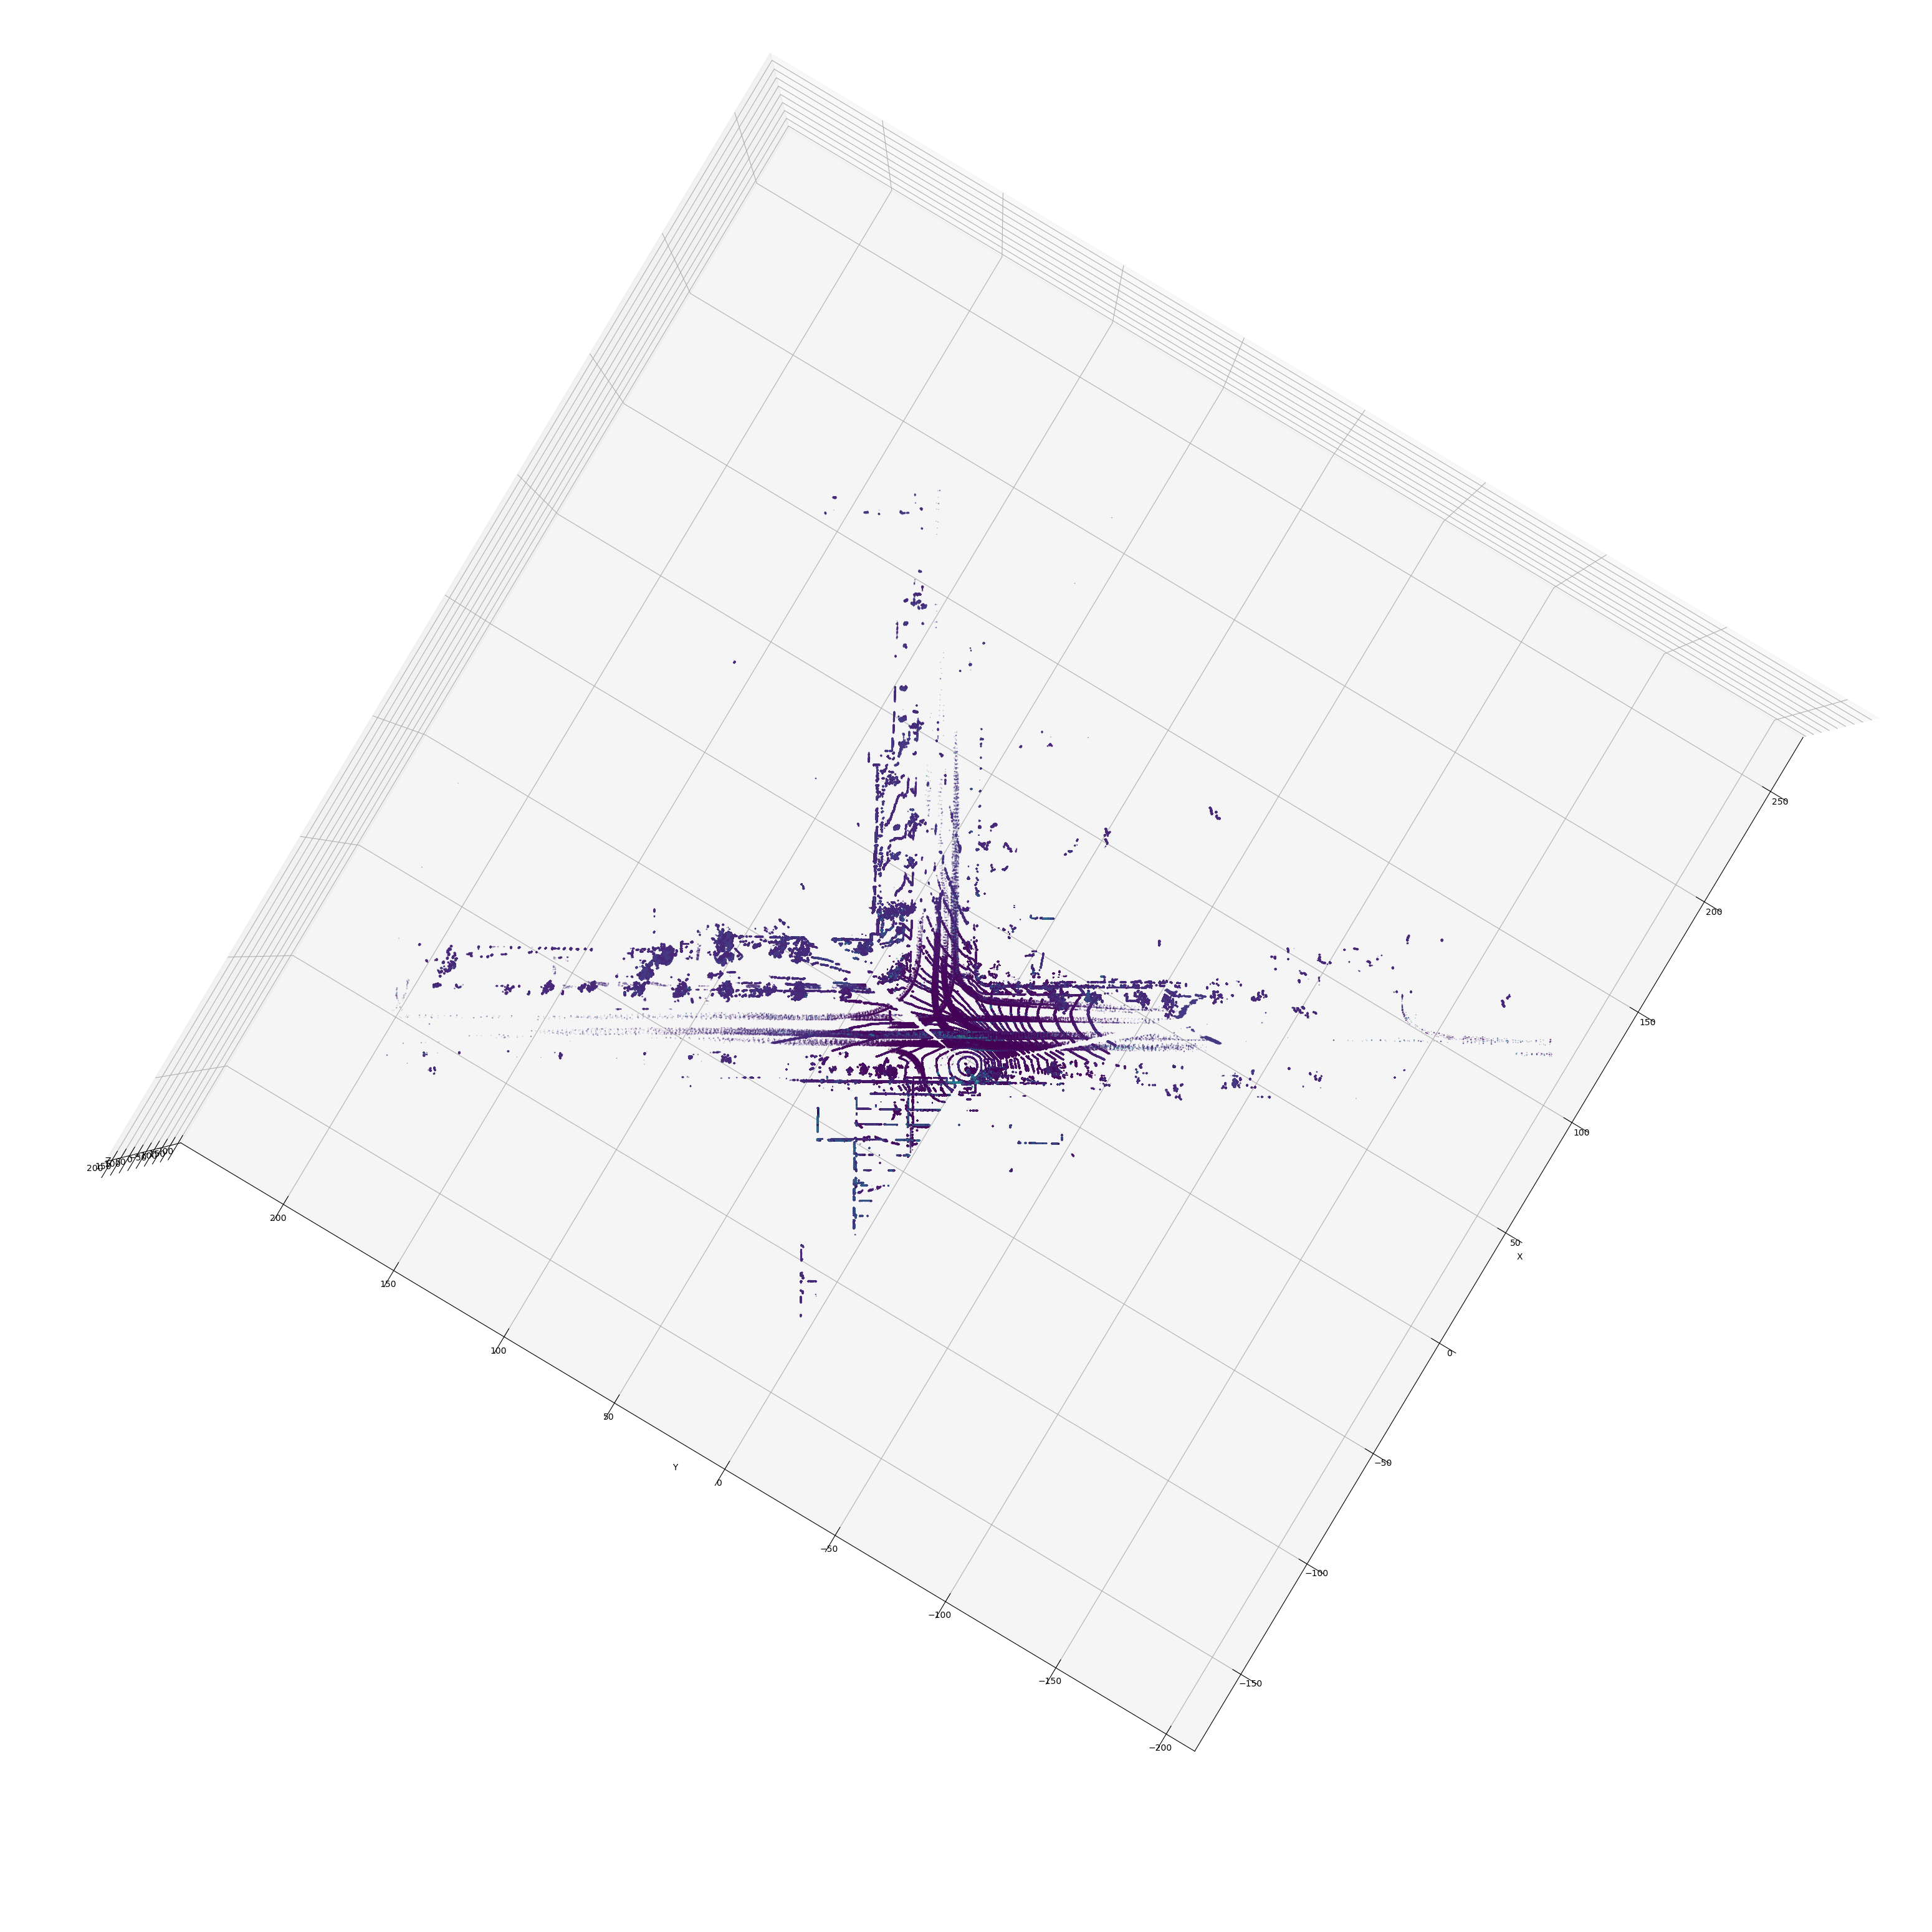

In [70]:
# Set up the plot
fig = plt.figure(figsize=(40, 40))
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud
ax.scatter(first_section['X'], first_section['Y'], first_section['Z'], s=0.1, c=first_section['Intensity'], cmap='viridis', marker=',')

# Setting the axes properties
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adjust the view angle if needed
ax.view_init(elev=90, azim=210) # You can change these angles to get a better view

# Fix aspect ratio
set_axes_equal(ax)

plt.show()